<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro Stats Exercise

In [1]:
#General imports
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Part 1. Basic Stats
	
    Methods available include: 
		.min() - Compute minimum value
		.max() - Compute maximum value
		.mean() - Compute mean value
		.median() - Compute median value
        .mode() - Compute mode value(s)
		.count() - Count the number of observations

#### 1. Read in the examples

In [2]:
df = pd.DataFrame({'example1' : [18, 24, 17, 21, 24, 16, 29, 18], 'example2' : [75, 87, 49, 68, 75, 84, 98, 92], 'example3' : [55, 47, 38, 66, 56, 64, 44, 39] })
print(df)


   example1  example2  example3
0        18        75        55
1        24        87        47
2        17        49        38
3        21        68        66
4        24        75        56
5        16        84        64
6        29        98        44
7        18        92        39


#### 2. Calculate the mean for each coloumn

In [3]:
df.mean()

example1    20.875
example2    78.500
example3    51.125
dtype: float64

#### 3.  Calculate median, mode, max, min for the example

Note: All answers should match your hand calculations

In [4]:
df.max()

example1    29
example2    98
example3    66
dtype: int64

In [5]:
df.min()

example1    16
example2    49
example3    38
dtype: int64

In [6]:
df.median()

example1    19.5
example2    79.5
example3    51.0
dtype: float64

In [7]:
df.mode()

,example1,example2,example3
0,18.0,75.0,38
1,24.0,NaN,39
2,NaN,NaN,44
3,NaN,NaN,47
4,NaN,NaN,55
5,NaN,NaN,56
6,NaN,NaN,64
7,NaN,NaN,66


### Part 2. Box Plot

#### 1. Example: Interquartile range 

In [8]:
print("50% Quartile:")
print(df.quantile(.50)) 
print("Median (red line of the box)")
print(df.median())

50% Quartile:
example1    19.5
example2    79.5
example3    51.0
Name: 0.5, dtype: float64
Median (red line of the box)
example1    19.5
example2    79.5
example3    51.0
dtype: float64


In [9]:
print("25% (bottom of the box)")
print(df.quantile(0.25))
print("75% (top of the box)")
print(df.quantile(0.75))

25% (bottom of the box)
example1    17.75
example2    73.25
example3    42.75
Name: 0.25, dtype: float64
75% (top of the box)
example1    24.00
example2    88.25
example3    58.00
Name: 0.75, dtype: float64


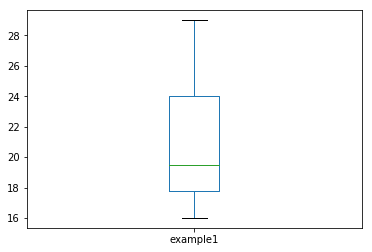

In [10]:
df['example1'].plot(kind='box')

#### 2. Create plots for examples 2 and 3 and check the quartiles

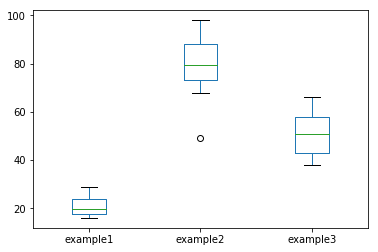

In [11]:
df.plot(kind="box")

#### 3. What does the cross in example 2 represent?

Answer: an outlier

### Part 3. Standard Deviation and Variance

**Variance:** The variance is how much the predictions for a given point vary between different realizations of the model.

**Standard Deviation:** The square root of the variance

![Bias and Variance](../assets/images/biasVsVarianceImage.png)

#### 1. Calculate variance in pandas
	
    Methods include: 
		.std() - Compute Standard Deviation
		.var() - Compute variance

In [12]:
# in pandas
print("Variance")
print(df["example1"].var())

Variance
20.125


#### 2. Calculate the standard deviation

In [13]:
#now with pandas
df.std()

example1     4.486090
example2    15.445758
example3    10.776131
dtype: float64

#### 3. Short Cut!

In [14]:
df.describe()

,example1,example2,example3
count,8.00000,8.000000,8.000000
mean,20.87500,78.500000,51.125000
std,4.48609,15.445758,10.776131
min,16.00000,49.000000,38.000000
25%,17.75000,73.250000,42.750000
50%,19.50000,79.500000,51.000000
75%,24.00000,88.250000,58.000000
max,29.00000,98.000000,66.000000



Which value in the above table is the median? 

Answer: 50%

### Part 4: Correlation

Explore the correlation of variables in the dataframe

In [15]:
df.corr()

,example1,example2,example3
example1,1.000000,0.477283,-0.123745
example2,0.477283,1.000000,-0.057076
example3,-0.123745,-0.057076,1.000000


### Part 5. Distibutions
	
#### 1. Generate a uniform distribution, and plot it.

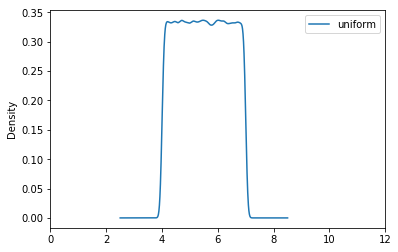

In [16]:
uniform_data = np.random.uniform(4,7, size=500000)

uniform_df = pd.DataFrame({"uniform":uniform_data})

uniform_df.plot(kind="density", xlim=(0,12))

#### 2. Generate some random numbers with a normal distribution. "mu" is the desired mean, "sigma" is the standard deviation:

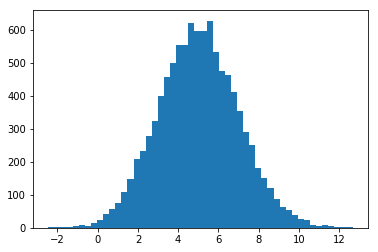

In [17]:
mu = 5.0
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values, 50)
plt.show()

#### 3. Plot a box plot of your dataframe

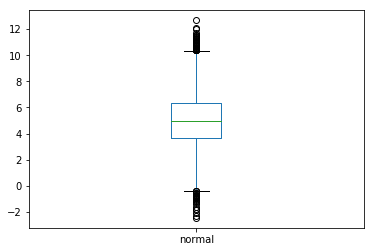

In [18]:
normal_df = pd.DataFrame({"normal":values})
normal_df['normal'].plot(kind='box')

### Part 6. Skew and Kurtosis

Generate normal, skewed and kurtotic distributions, and find their skew and kurtosis values. Plot them.

In [19]:
norm_data = np.random.normal(size=100000)

skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)

peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "peaked":peaked_data})


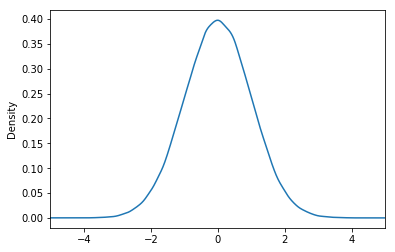

In [20]:
data_df["norm"].plot(kind="density", xlim=(-5,5))

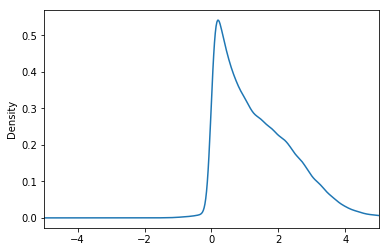

In [21]:
data_df["skewed"].plot(kind="density", xlim=(-5,5))

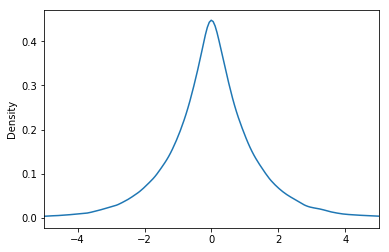

In [22]:
data_df["peaked"].plot(kind="density", xlim=(-5,5))

In [23]:
data_df.skew()

norm     -0.003063
peaked   -0.012317
skewed    1.005522
dtype: float64

In [24]:
data_df.kurt()

norm      0.010222
peaked    3.293451
skewed    1.277858
dtype: float64